
# **Análisis de Reseñas de Productos en Amazon**

## **Contexto del problema**
Hoy en día, los marketplaces como **Amazon** reciben millones de reseñas de productos, las cuales influyen en la toma de decisiones de los consumidores. Comprender estas reseñas permite a las empresas mejorar productos, ajustar estrategias de venta, y optimizar la experiencia del cliente. Sin embargo, analizar grandes volúmenes de datos manualmente es ineficiente.

## **Objetivo del proyecto**
Nuestro objetivo es **predecir la valoración general (rating) de un producto** a partir de las características extraídas de las reseñas (como el texto, la cantidad de comentarios útiles o el número de votos). La variable objetivo será, por tanto, el **rating**, y trabajaremos con un enfoque de **clasificación supervisada**.

## **Situación de negocio**
Amazon necesita identificar patrones que lleven a valoraciones bajas o altas para:
1. **Identificar productos mal valorados** y optimizar su oferta.
2. **Mejorar recomendaciones de productos** para diferentes segmentos de clientes.
3. **Automatizar la evaluación** de reseñas en función de ciertos patrones.

---

## **Estructura del Notebook**

### **1. Carga del Dataset**
Se descarga el dataset de Kaggle, se descomprime y se carga en un DataFrame de Pandas para su análisis.

### **2. Análisis Exploratorio**
Se exploran las primeras filas del dataset y se evalúa la existencia de valores nulos.
* Si los nulos representan menos del 5% del total, se eliminan.
* Si superan ese porcentaje, se considerará la imputación.

### **3. Visualización de Datos**
Se emplean gráficos para comprender la distribución de los ratings y detectar posibles outliers.

### **4. Preprocesamiento de Datos**
Se toman medidas para eliminar o imputar valores nulos según corresponda.

### **5. Modelado Predictivo**
Se selecciona un modelo supervisado para predecir el **rating** y se evalúa su desempeño.


In [1]:
# Instalamos la librería kaggle para descargar datasets
!pip install kaggle


In [2]:
# Descargamos el dataset de reseñas desde Kaggle
!kaggle datasets download -d arhamrumi/amazon-product-reviews

Dataset URL: https://www.kaggle.com/datasets/arhamrumi/amazon-product-reviews
License(s): CC0-1.0
 98% 112M/115M [00:01<00:00, 73.3MB/s]
100% 115M/115M [00:01<00:00, 67.5MB/s]


In [3]:
# Descomprimimos el archivo zip para acceder a los datos
!unzip amazon-product-reviews.zip

Archive:  amazon-product-reviews.zip
  inflating: Reviews.csv             


In [5]:
from google.colab import files
uploaded = files.upload()

Saving Amazon.zip to Amazon.zip


In [7]:
# Cargamos el dataset en un DataFrame de Pandas
import pandas as pd
df = pd.read_csv('Amazon.zip')
print(df.head())

                     id       asins   brand                  categories  \
0  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
1  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
2  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
3  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
4  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   

  colors             dateAdded           dateUpdated  \
0    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
1    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
2    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
3    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
4    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   

                  dimension  ean                         keys  ...  \
0  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
1  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
2 

In [8]:
print(df.shape)


(1597, 27)


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1597 non-null   object 
 1   asins                 1597 non-null   object 
 2   brand                 1597 non-null   object 
 3   categories            1597 non-null   object 
 4   colors                774 non-null    object 
 5   dateAdded             1597 non-null   object 
 6   dateUpdated           1597 non-null   object 
 7   dimension             565 non-null    object 
 8   ean                   898 non-null    float64
 9   keys                  1597 non-null   object 
 10  manufacturer          965 non-null    object 
 11  manufacturerNumber    902 non-null    object 
 12  name                  1597 non-null   object 
 13  prices                1597 non-null   object 
 14  reviews.date          1217 non-null   object 
 15  reviews.doRecommend  

**reviewerID / customer_id**

Descripción: Identificador único del cliente que dejó la reseña.
Relevancia: Permite analizar hábitos de compra o tendencias de usuarios frecuentes.

**productID / asin **

Descripción: Identificador del producto reseñado.
Relevancia: Es clave para agrupar reseñas por producto y detectar qué productos son más populares o problemáticos.

**rating / overall (de 1 a 5)**

Descripción: Calificación numérica otorgada por el usuario.
Relevancia: Útil para análisis de opiniones, puntuaciones promedio y modelos de recomendación.
Análisis potencial: Distribución de calificaciones, identificación de productos con alta/ baja aceptación.

**review_text / review_body**

Descripción: Contenido textual de la reseña.
Relevancia: Ideal para minería de texto y análisis de sentimientos, identificando emociones o temas frecuentes.

**review_date / timestamp**

Descripción: Fecha de publicación de la reseña.
Relevancia: Permite evaluar cómo cambia la percepción del producto con el tiempo o realizar análisis estacionales.

**verified_purchase**

Descripción: Indica si la compra fue verificada.
Relevancia: Garantiza la autenticidad de la reseña, relevante para evaluar la fiabilidad de las opiniones.

**category / product_category**

Descripción: Categoría del producto (por ejemplo, "Electrónica", "Libros", etc.).
Relevancia: Permite segmentar análisis por industria o tipo de producto.

**helpful_votes / helpful**

Descripción: Número de votos indicando que la reseña fue útil para otros usuarios.
Relevancia: Identifica reseñas de alta calidad y usuarios influyentes en la plataforma.

**price**

Descripción: Precio del producto al momento de la compra.
Relevancia: Se puede correlacionar con la satisfacción del cliente o detectar patrones de precios y valor percibido.

**brand / manufacturer**

Descripción: Marca o fabricante del producto.
Relevancia: Sirve para evaluar la percepción de marcas específicas en el mercado.


In [10]:
# Cargamos el dataset en un DataFrame de Pandas
import pandas as pd

df = pd.read_csv('Amazon.zip')


print(df.head())

                     id       asins   brand                  categories  \
0  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
1  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
2  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
3  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
4  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   

  colors             dateAdded           dateUpdated  \
0    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
1    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
2    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
3    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
4    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   

                  dimension  ean                         keys  ...  \
0  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
1  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
2 

In [11]:
# Resumen estadístico: incluye media, desviación estándar, mínimos y máximos
print(df.describe())

                ean  reviews.numHelpful  reviews.rating  reviews.userCity  \
count  8.980000e+02          900.000000     1177.000000               0.0   
mean   8.443135e+11           83.584444        4.359388               NaN   
std    3.416444e+09          197.150238        1.021445               NaN   
min    8.416670e+11            0.000000        1.000000               NaN   
25%    8.416670e+11            0.000000        4.000000               NaN   
50%    8.416670e+11            0.000000        5.000000               NaN   
75%    8.487190e+11           34.000000        5.000000               NaN   
max    8.487190e+11          997.000000        5.000000               NaN   

       reviews.userProvince  sizes           upc  
count                   0.0    0.0  8.980000e+02  
mean                    NaN    NaN  8.443135e+11  
std                     NaN    NaN  3.416444e+09  
min                     NaN    NaN  8.416670e+11  
25%                     NaN    NaN  8.416670e+11  


In [12]:
print(df.columns)


Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'upc', 'weight'],
      dtype='object')


In [13]:
brand_counts = df['brand'].value_counts()
print(brand_counts)

brand
Amazon    1585
Moshi       12
Name: count, dtype: int64


In [14]:
category_counts = df['categories'].value_counts()
print(category_counts)

categories
Amazon Devices,Home,Smart Home & Connected Living,Smart Hubs & Wireless Routers,Smart Hubs,Home Improvement,Home Safety & Security,Alarms & Sensors,Home Security,Amazon Echo,Home, Garage & Office,Smart Home,Voice Assistants,Amazon Tap,Electronics Features,TVs & Electronics,Portable Audio & Electronics,MP3 Player Accessories,Home Theater & Audio,Speakers,Featured Brands,Electronics,Kindle Store,Frys,Electronic Components,Home Automation,Electronics, Tech Toys, Movies, Music,Audio,Bluetooth Speakers    542
Amazon Devices                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [15]:
rating_counts = df['reviews.rating'].value_counts()
print(rating_counts)

reviews.rating
5.0    741
4.0    236
3.0    124
1.0     42
2.0     34
Name: count, dtype: int64


In [16]:
from textblob import TextBlob

# Analiza el sentimiento de las primeras 5 reseñas
sentiments = df['reviews.text'].apply(lambda x: TextBlob(x).sentiment.polarity)
print(sentiments.head())

0    0.200259
1    0.159591
2    0.420833
3    0.148821
4    0.267086
Name: reviews.text, dtype: float64


In [17]:
helpful_counts = df['reviews.numHelpful'].value_counts()
print(helpful_counts)

reviews.numHelpful
0.0      504
2.0       23
3.0       18
1.0       16
5.0       15
        ... 
834.0      1
323.0      1
102.0      1
790.0      1
136.0      1
Name: count, Length: 182, dtype: int64


In [18]:
recommendation_counts = df['reviews.doRecommend'].value_counts()
print(recommendation_counts)

reviews.doRecommend
True     503
False     36
Name: count, dtype: int64


In [19]:
df['dateAdded'] = pd.to_datetime(df['dateAdded'], errors='coerce')
reviews_per_month = df['dateAdded'].dt.to_period('M').value_counts()
print(reviews_per_month)

dateAdded
2017-01    554
2015-05    248
2017-07    138
2015-07    133
2015-06    104
2017-06    100
2016-05     99
2016-02     50
2017-03     42
2015-01     32
2016-03     23
2017-08     23
2016-01     17
2017-02     15
2016-04     12
2015-11      7
Freq: M, Name: count, dtype: int64


<ipython-input-19-030945f380ef>:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  reviews_per_month = df['dateAdded'].dt.to_period('M').value_counts()


In [20]:
location_counts = df['reviews.userCity'].value_counts()
print(location_counts)

Series([], Name: count, dtype: int64)


In [21]:
# Cargamos el dataset en un DataFrame de Pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv('Amazon.zip')

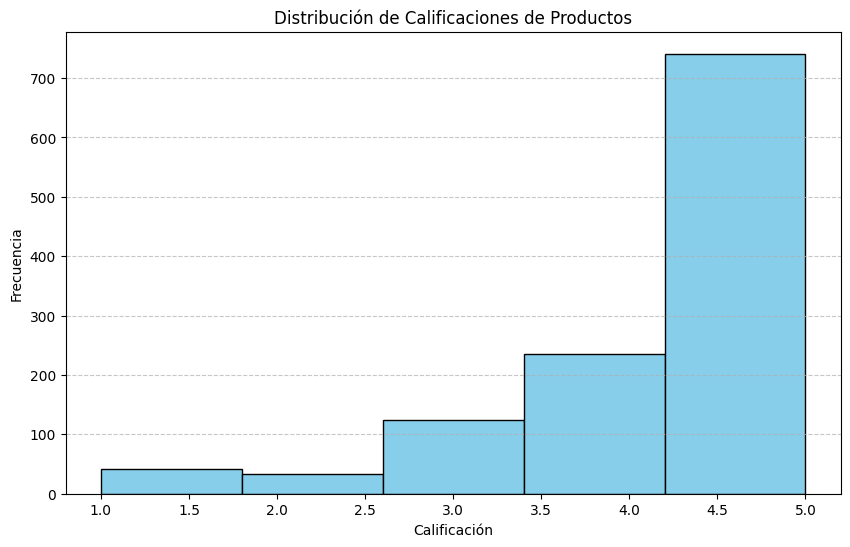

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(df['reviews.rating'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribución de Calificaciones de Productos')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Este histograma muestra cómo se distribuyen las calificaciones de los productos. Un pico en las calificaciones más altas podría indicar que los productos son bien recibidos, mientras que un sesgo hacia las calificaciones bajas podría señalar problemas de calidad o insatisfacción del cliente.

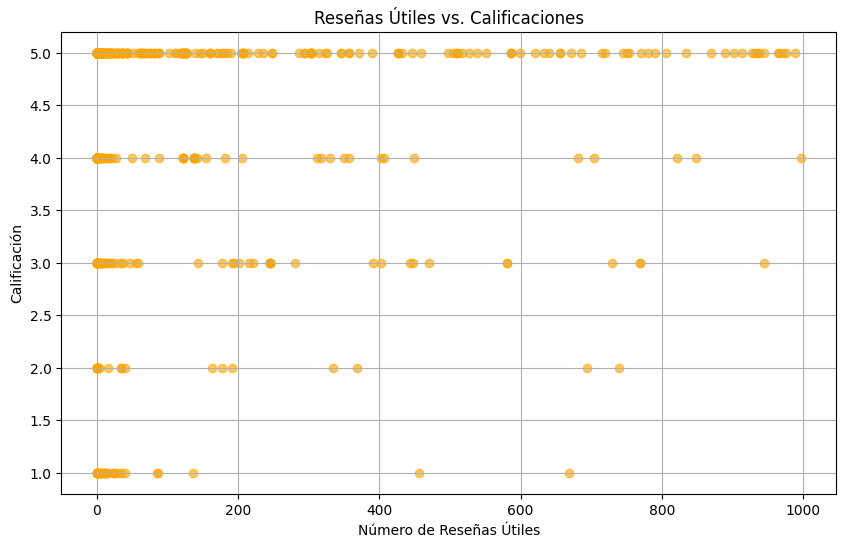

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(df['reviews.numHelpful'], df['reviews.rating'], alpha=0.6, color='orange')
plt.title('Reseñas Útiles vs. Calificaciones')
plt.xlabel('Número de Reseñas Útiles')
plt.ylabel('Calificación')
plt.grid(True)
plt.show()

Este gráfico de dispersión puede mostrar la relación entre el número de reseñas útiles y las calificaciones. Un patrón creciente podría sugerir que las reseñas más útiles tienden a ser también las mejor valoradas, lo que sugiere que las opiniones bien argumentadas son más valoradas por otros usuarios.

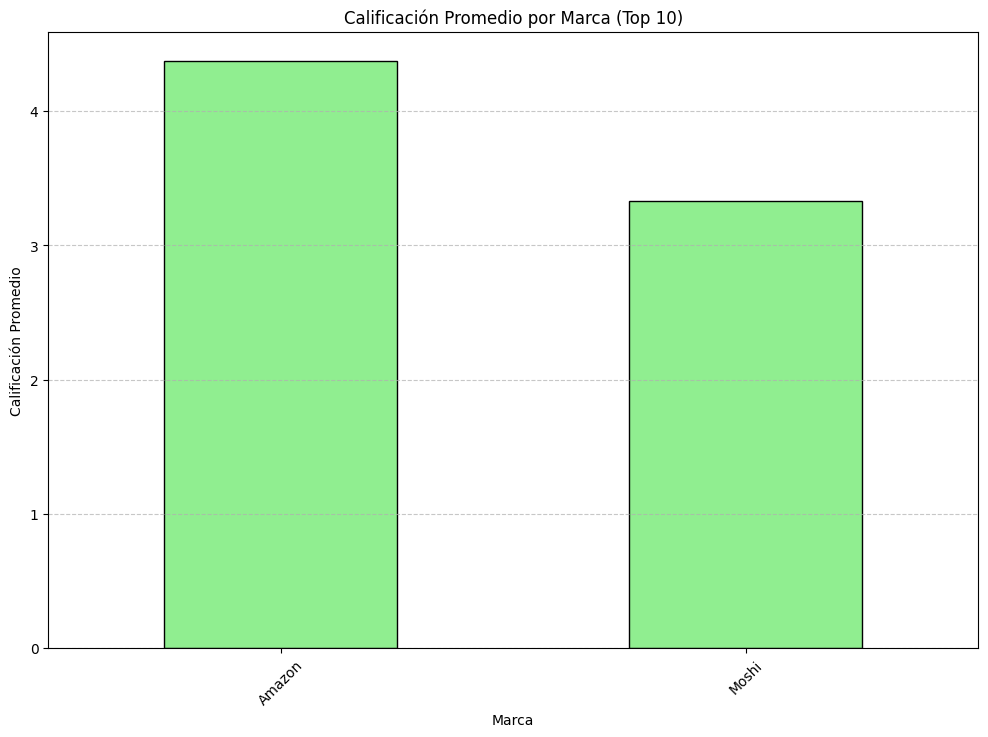

In [24]:
plt.figure(figsize=(12, 8))
brands = df['brand'].value_counts().nlargest(10).index  # Selecciona las 10 marcas más frecuentes
mean_ratings = df[df['brand'].isin(brands)].groupby('brand')['reviews.rating'].mean()
mean_ratings.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Calificación Promedio por Marca (Top 10)')
plt.xlabel('Marca')
plt.ylabel('Calificación Promedio')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Este gráfico de barras permite comparar la calificación promedio de las principales marcas. Marcas con calificaciones consistentemente altas podrían ser consideradas como más confiables por los consumidores, lo que podría influir en futuras decisiones de compra.



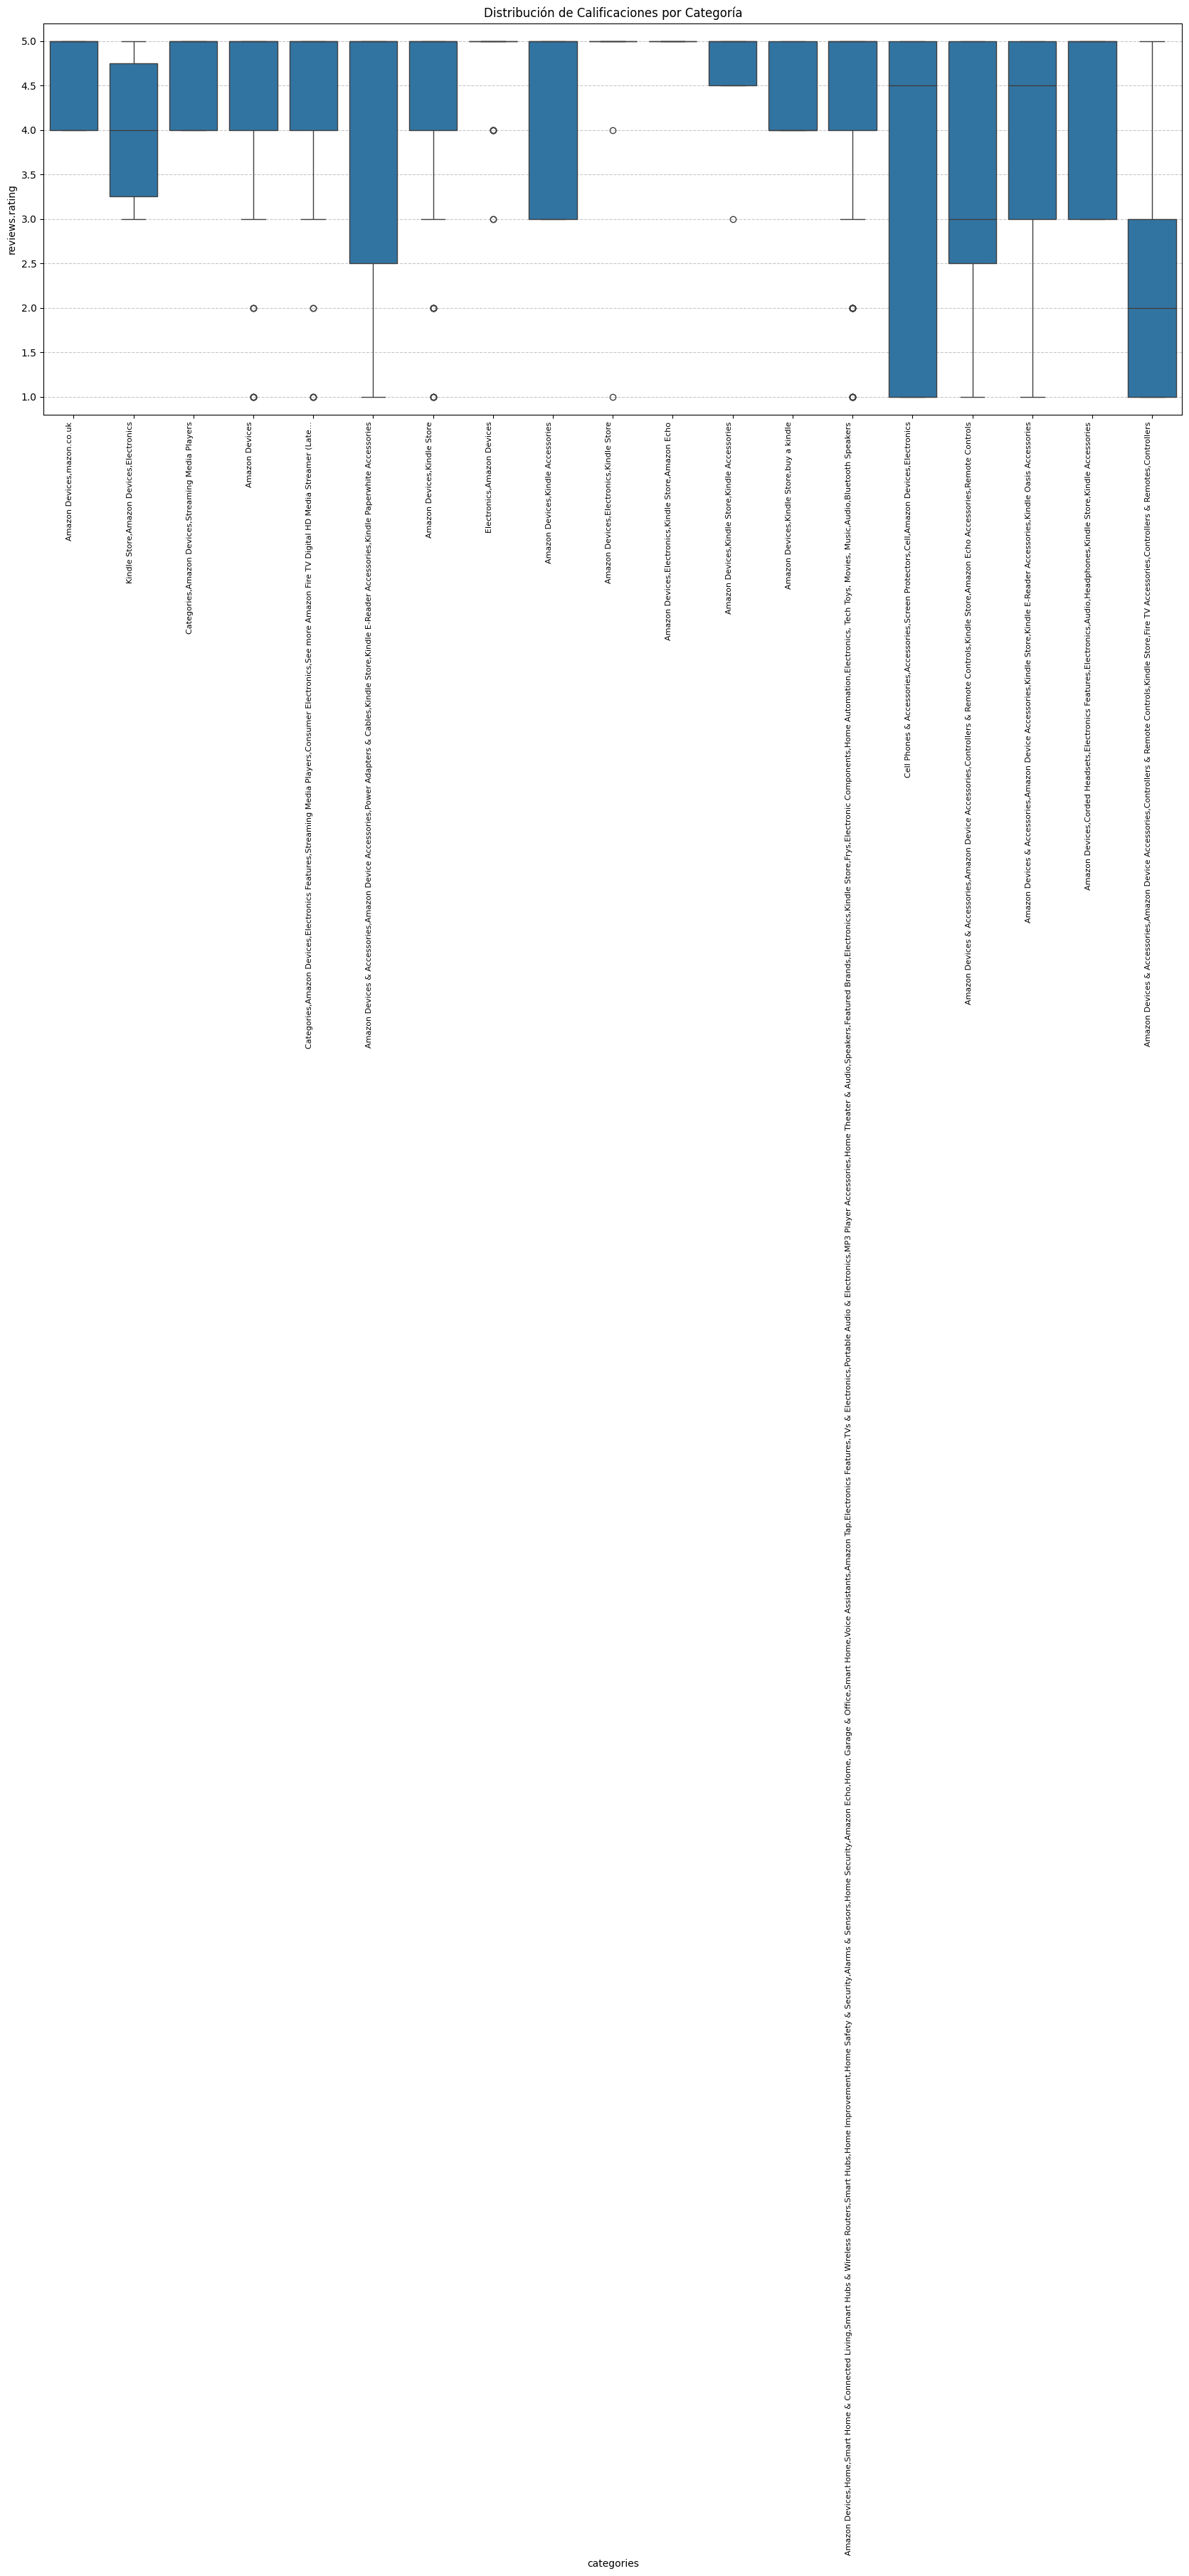

In [39]:
# Visualizar el boxplot con etiquetas rotadas y tamaño reducido
plt.figure(figsize=(20, 10))
sns.boxplot(x='categories', y='reviews.rating', data=df)
plt.title('Distribución de Calificaciones por Categoría')
plt.xticks(rotation=90, ha='right', fontsize=8)  # Rotar etiquetas 90 grados y reducir el tamaño de fuente
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajuste de los márgenes manualmente
plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.3)
plt.show()

Este gráfico de caja muestra la distribución de calificaciones dentro de cada categoría de productos. Puede ayudar a identificar cuáles categorías tienden a recibir mejores o peores calificaciones.

<ipython-input-26-e414ea10fd03>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='reviews.doRecommend', y='reviews.rating', data=df, ci=None)


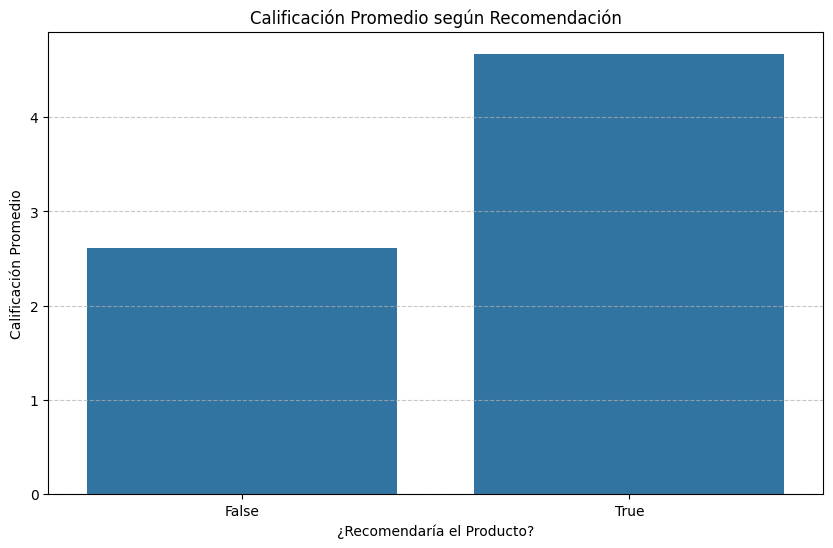

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x='reviews.doRecommend', y='reviews.rating', data=df, ci=None)
plt.title('Calificación Promedio según Recomendación')
plt.xlabel('¿Recomendaría el Producto?')
plt.ylabel('Calificación Promedio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Este gráfico de barras compara las calificaciones promedio según si los usuarios recomendarían el producto. Un contraste significativo entre las dos categorías (sí/no) puede señalar la importancia de las recomendaciones en la percepción del producto.

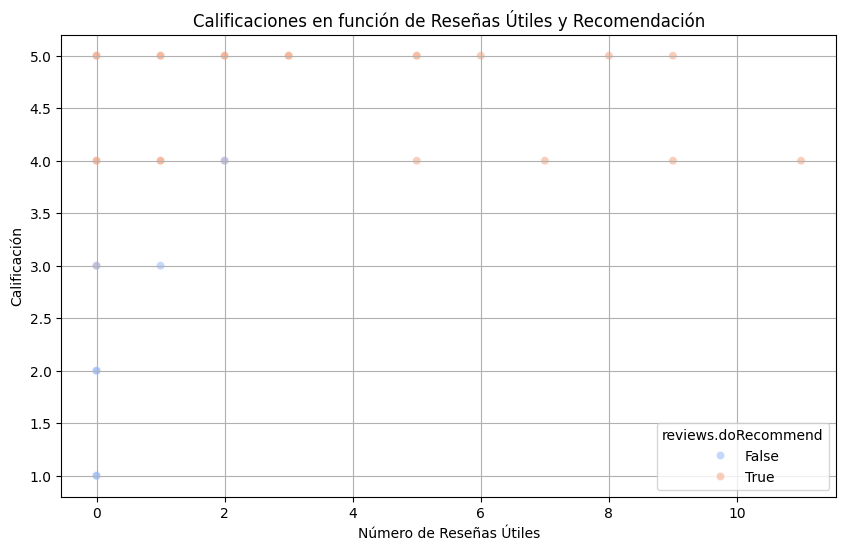

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reviews.numHelpful', y='reviews.rating', data=df, hue='reviews.doRecommend', palette='coolwarm', alpha=0.7)
plt.title('Calificaciones en función de Reseñas Útiles y Recomendación')
plt.xlabel('Número de Reseñas Útiles')
plt.ylabel('Calificación')
plt.grid(True)
plt.show()

Este gráfico de dispersión incluye un color (hue) para diferenciar entre las reseñas que recomiendan el producto y las que no. Esto puede ofrecer un entendimiento visual más profundo de cómo las recomendaciones afectan las calificaciones, destacando patrones de comportamiento del consumidor.

**Conclusión**:

Los gráficos generados proporcionan una visión general de cómo los usuarios perciben y evalúan productos en el dataset. Al observar las distribuciones de calificaciones, la relación entre reseñas útiles y calificaciones, y cómo se comparan diferentes marcas y categorías, puedes extraer insights valiosos que informen decisiones estratégicas en marketing y desarrollo de productos.






